In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

from sklearn.model_selection import train_test_split

In [51]:
# loading the data from csv file to a Pandas DataFrame
calories = pd.read_csv('calories.csv')

In [52]:
# print the first 5 rows of the dataframe
calories.head()

,User_ID,Calories
0,14733363,231.0
1,14861698,66.0
2,11179863,26.0
3,16180408,71.0
4,17771927,35.0


In [53]:
calories = calories.drop(columns=['User_ID'])

In [54]:
# print the first 5 rows of the dataframe
calories.head()

,Calories
0,231.0
1,66.0
2,26.0
3,71.0
4,35.0


In [55]:
# loading the data from csv file to a Pandas DataFrame
exercise_data = pd.read_csv('exercise.csv')

In [56]:
exercise_data.head()

,User_ID,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,14733363,male,68,190.0,94.0,29.0,105.0,40.8
1,14861698,female,20,166.0,60.0,14.0,94.0,40.3
2,11179863,male,69,179.0,79.0,5.0,88.0,38.7
3,16180408,female,34,179.0,71.0,13.0,100.0,40.5
4,17771927,female,27,154.0,58.0,10.0,81.0,39.8


In [57]:
exercise_data = exercise_data.drop(columns=['User_ID'])

In [58]:
exercise_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,male,68,190.0,94.0,29.0,105.0,40.8
1,female,20,166.0,60.0,14.0,94.0,40.3
2,male,69,179.0,79.0,5.0,88.0,38.7
3,female,34,179.0,71.0,13.0,100.0,40.5
4,female,27,154.0,58.0,10.0,81.0,39.8


In [59]:
#Combining the two Dataframes
calories_data = pd.concat([exercise_data, calories['Calories']], axis=1)

In [60]:
calories_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,male,68,190.0,94.0,29.0,105.0,40.8,231.0
1,female,20,166.0,60.0,14.0,94.0,40.3,66.0
2,male,69,179.0,79.0,5.0,88.0,38.7,26.0
3,female,34,179.0,71.0,13.0,100.0,40.5,71.0
4,female,27,154.0,58.0,10.0,81.0,39.8,35.0


In [61]:
# checking the number of rows and columns
calories_data.shape

(15000, 8)

In [62]:
# getting some information about the data
calories_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Gender      15000 non-null  object 
 1   Age         15000 non-null  int64  
 2   Height      15000 non-null  float64
 3   Weight      15000 non-null  float64
 4   Duration    15000 non-null  float64
 5   Heart_Rate  15000 non-null  float64
 6   Body_Temp   15000 non-null  float64
 7   Calories    15000 non-null  float64
dtypes: float64(6), int64(1), object(1)
memory usage: 937.6+ KB


In [63]:
# checking for missing values
calories_data.isnull().sum()

Gender        0
Age           0
Height        0
Weight        0
Duration      0
Heart_Rate    0
Body_Temp     0
Calories      0
dtype: int64

In [64]:
# get some statistical measures about the data
calories_data.describe()

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000,15000.000000
mean,42.789800,174.465133,74.966867,15.530600,95.518533,40.025453,89.539533
std,16.980264,14.258114,15.035657,8.319203,9.583328,0.779230,62.456978
min,20.000000,123.000000,36.000000,1.000000,67.000000,37.100000,1.000000
25%,28.000000,164.000000,63.000000,8.000000,88.000000,39.600000,35.000000
50%,39.000000,175.000000,74.000000,16.000000,96.000000,40.200000,79.000000
75%,56.000000,185.000000,87.000000,23.000000,103.000000,40.600000,138.000000
max,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [65]:
le = LabelEncoder()

for column in calories_data.columns:
    if calories_data[column].dtype == "object":
        calories_data[column] = le.fit_transform(calories_data[column])
        print(f"Column :{column}, Unique Values : {calories_data[column].unique()}")

Column :Gender, Unique Values : [1 0]


In [66]:
calories_data.head()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,1,68,190.0,94.0,29.0,105.0,40.8,231.0
1,0,20,166.0,60.0,14.0,94.0,40.3,66.0
2,1,69,179.0,79.0,5.0,88.0,38.7,26.0
3,0,34,179.0,71.0,13.0,100.0,40.5,71.0
4,0,27,154.0,58.0,10.0,81.0,39.8,35.0


In [67]:
calories_data.corr()

,Gender,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Gender,1.000000,0.003222,0.710534,0.783186,0.003440,0.011555,0.007264,0.022357
Age,0.003222,1.000000,0.009554,0.090094,0.013247,0.010482,0.013175,0.154395
Height,0.710534,0.009554,1.000000,0.958451,-0.004625,0.000528,0.001200,0.017537
Weight,0.783186,0.090094,0.958451,1.000000,-0.001884,0.004311,0.004095,0.035481
Duration,0.003440,0.013247,-0.004625,-0.001884,1.000000,0.852869,0.903167,0.955421
Heart_Rate,0.011555,0.010482,0.000528,0.004311,0.852869,1.000000,0.771529,0.897882
Body_Temp,0.007264,0.013175,0.001200,0.004095,0.903167,0.771529,1.000000,0.824558
Calories,0.022357,0.154395,0.017537,0.035481,0.955421,0.897882,0.824558,1.000000


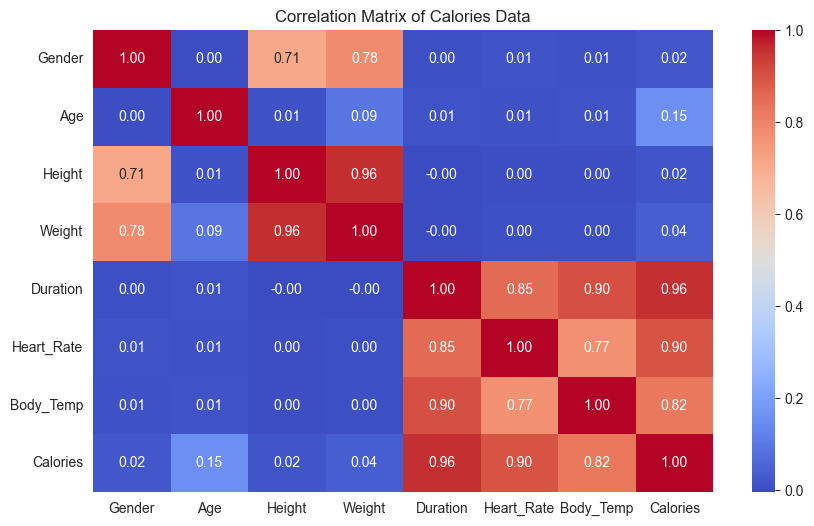

In [68]:
plt.figure(figsize=(10, 6))
sns.heatmap(calories_data.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix of Calories Data")
plt.show()

In [69]:
# Separate features and target
X = calories_data.drop(columns=['Calories'])  # Features
y = calories_data['Calories']

In [70]:
# Standardizing the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [71]:
# Splitting into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [72]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [73]:
y_pred = model.predict(X_test)

In [74]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE for linear Regression : {rmse:.2f}")
print(f"MAE for linear Regression : {mae:.2f}")
print(f"R-squared for linear Regression : {r2:.2f}")

RMSE: 11.49
MAE: 8.44
R-squared: 0.97


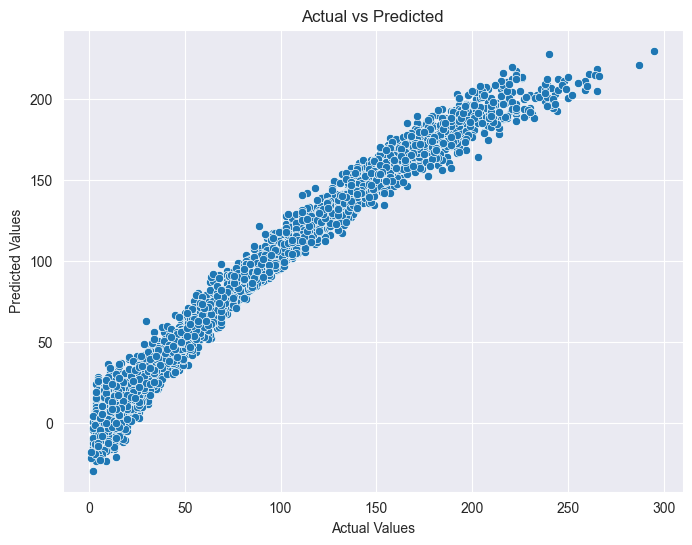

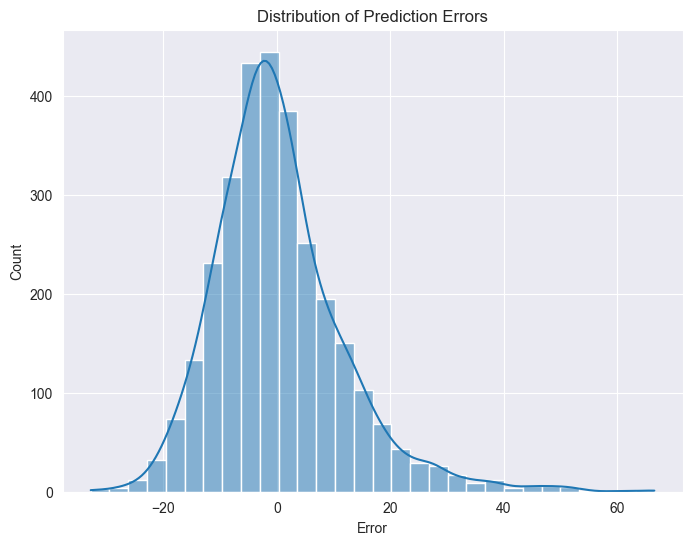

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns


plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs Predicted")
plt.grid(True)
plt.show()


errors = y_test - y_pred
plt.figure(figsize=(8, 6))
sns.histplot(errors, bins=30, kde=True)
plt.title("Distribution of Prediction Errors")
plt.xlabel("Error")
plt.grid(True)
plt.show()


In [76]:
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

In [78]:

rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred))
mae_lr = mean_absolute_error(y_test, y_pred)
r2_lr = r2_score(y_test, y_pred)


rmse_rf = np.sqrt(mean_squared_error(y_test, y_pred_rf))
mae_rf = mean_absolute_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f"RMSE for Random Forest : {rmse:.2f}")
print(f"MAE for Random Forest : {mae:.2f}")
print(f"R-squared for Random Forest : {r2:.2f}")

RMSE for Random Forest : 11.49
MAE for Random Forest : 8.44
R-squared for Random Forest : 0.97


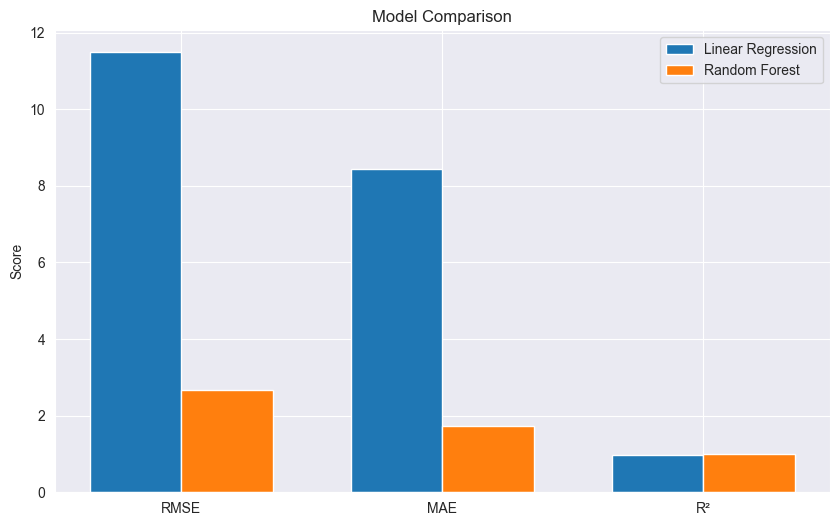

In [79]:

metrics = ['RMSE', 'MAE', 'R²']
lr_scores = [rmse_lr, mae_lr, r2_lr]
rf_scores = [rmse_rf, mae_rf, r2_rf]

x = np.arange(len(metrics))
width = 0.35

plt.figure(figsize=(10,6))
plt.bar(x - width/2, lr_scores, width, label='Linear Regression')
plt.bar(x + width/2, rf_scores, width, label='Random Forest')

plt.xticks(x, metrics)
plt.ylabel('Score')
plt.title('Model Comparison')
plt.legend()
plt.grid(True)
plt.show()

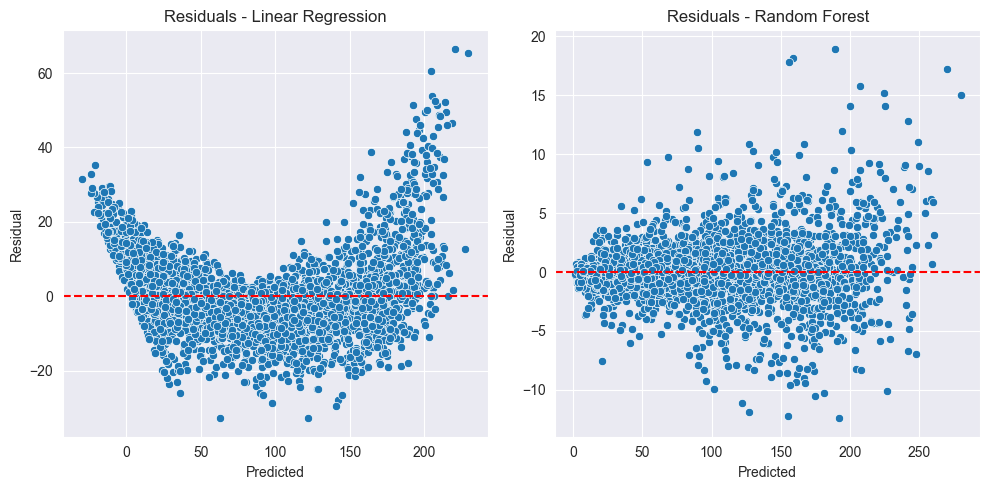

In [80]:

residuals_lr = y_test - y_pred
residuals_rf = y_test - y_pred_rf


plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=residuals_lr)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals - Linear Regression")
plt.xlabel("Predicted")
plt.ylabel("Residual")

plt.subplot(1, 2, 2)
sns.scatterplot(x=y_pred_rf, y=residuals_rf)
plt.axhline(0, color='red', linestyle='--')
plt.title("Residuals - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Residual")

plt.tight_layout()
plt.show()